In [12]:
import seaborn as sns
import pandas as pd
import os
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
default_path = "Reserach_Ref/lab_code_git/BlueFridgeNonLin"
current_dir = os.listdir("Reserach_Ref/lab_code_git/BlueFridgeNonLin")
three_state = pd.read_csv(f"{default_path}/three_state.csv")
three_state = three_state.drop(columns="Unnamed: 0")
three_state = three_state.sample(frac=1, random_state=42).reset_index(drop=True)

In [3]:
three_state.head()

,I1,Q1,I2,Q2,label
0,1974.651557,-6719.906185,8758.716481,-3702.415939,0
1,4718.507508,-5140.639708,7962.343756,-3825.856987,0
2,-5769.268736,-5372.539143,7810.664608,-3678.017883,2
3,2964.195550,-6020.215222,-673.858661,-2003.216975,1
4,-2313.673156,-10734.542024,6943.559392,-2817.826202,2


In [4]:
# Define features (X) and labels (y)
X = three_state.drop(columns=["label"])  # All columns except "label"
y = three_state["label"]  # Target labels

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shape of the splits
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (147456, 4), Test set: (36864, 4)


In [5]:
# Initialize LightGBM model with default parameters
lgbm = lgb.LGBMClassifier(objective="multiclass", num_class=3, n_jobs=-1)

# Define Stratified K-Fold to maintain class distribution across splits
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Compute CV scores
cv_scores = cross_val_score(lgbm, X, y, cv=cv, scoring="accuracy", n_jobs=-1)

# Print CV results
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Mean CV Accuracy: 0.8382 ± 0.0003


In [6]:
# Train the model on full training data
lgbm.fit(X_train, y_train)

# Predict on test set
y_pred = lgbm.predict(X_test)

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 147456, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Test Accuracy: 0.8411


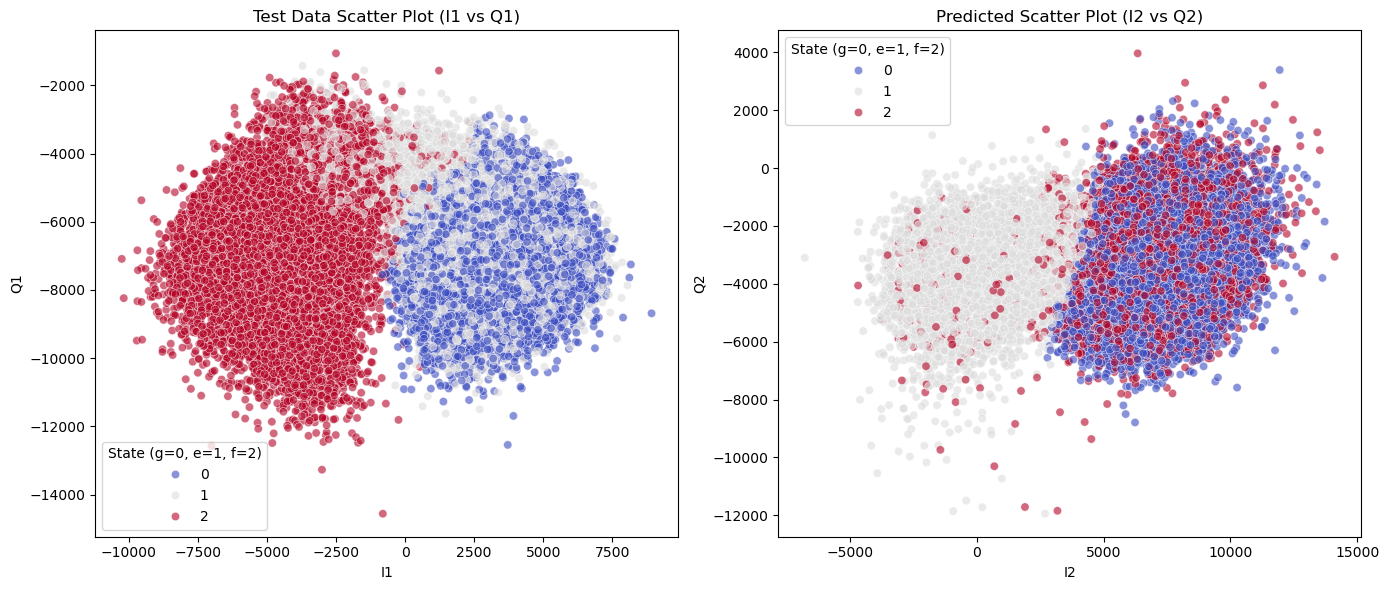

In [7]:
# Convert test data into a DataFrame for easier plotting
test_df = pd.DataFrame(X_test, columns=["I1", "Q1", "I2", "Q2"])
test_df["label"] = y_test  # Add true labels
test_df["predicted"] = y_pred  # Add predicted labels

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: I1 vs Q1
sns.scatterplot(
    data=test_df,
    x="I1",
    y="Q1",
    hue="predicted",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[0],
)
axes[0].set_xlabel("I1")
axes[0].set_ylabel("Q1")
axes[0].set_title("Test Data Scatter Plot (I1 vs Q1)")
axes[0].legend(title="State (g=0, e=1, f=2)")

# Second subplot: I2 vs Q2
sns.scatterplot(
    data=test_df,
    x="I2",
    y="Q2",
    hue="predicted",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[1],
)
axes[1].set_xlabel("I2")
axes[1].set_ylabel("Q2")
axes[1].set_title("Predicted Scatter Plot (I2 vs Q2)")
axes[1].legend(title="State (g=0, e=1, f=2)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

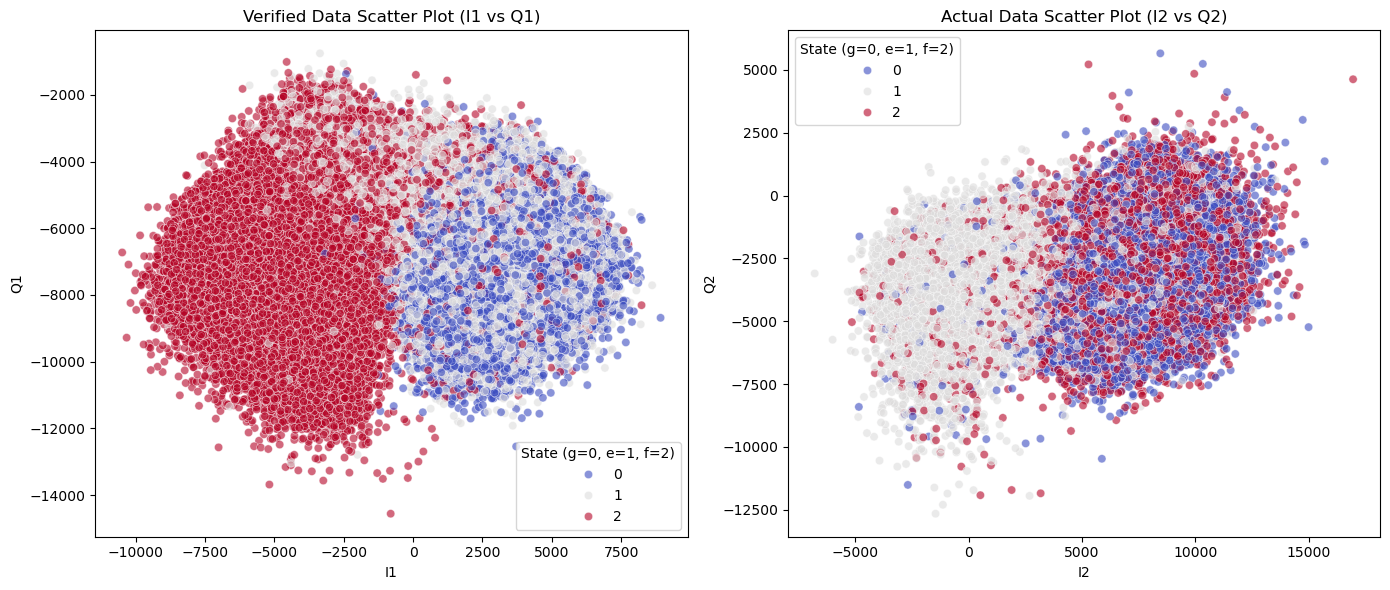

In [8]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: I1 vs Q1
sns.scatterplot(
    data=three_state,
    x="I1",
    y="Q1",
    hue="label",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[0],
)
axes[0].set_xlabel("I1")
axes[0].set_ylabel("Q1")
axes[0].set_title("Verified Data Scatter Plot (I1 vs Q1)")
axes[0].legend(title="State (g=0, e=1, f=2)")

# Second subplot: I2 vs Q2
sns.scatterplot(
    data=three_state,
    x="I2",
    y="Q2",
    hue="label",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[1],
)
axes[1].set_xlabel("I2")
axes[1].set_ylabel("Q2")
axes[1].set_title("Actual Data Scatter Plot (I2 vs Q2)")
axes[1].legend(title="State (g=0, e=1, f=2)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [9]:
new_data = pd.read_csv(f"{default_path}/three_state_pt2.csv")
new_data = new_data.drop(columns="Unnamed: 0")
new_data = new_data.sample(frac=1, random_state=42).reset_index(drop=True)
new_data_test = new_data.drop(columns="label")
new_data_label = new_data["label"]
# Predict on test set
new_pred = lgbm.predict(new_data_test)

new_test_accuracy = accuracy_score(new_data_label, new_pred)
print(f"Test Accuracy: {new_test_accuracy:.4f}")

Test Accuracy: 0.8270


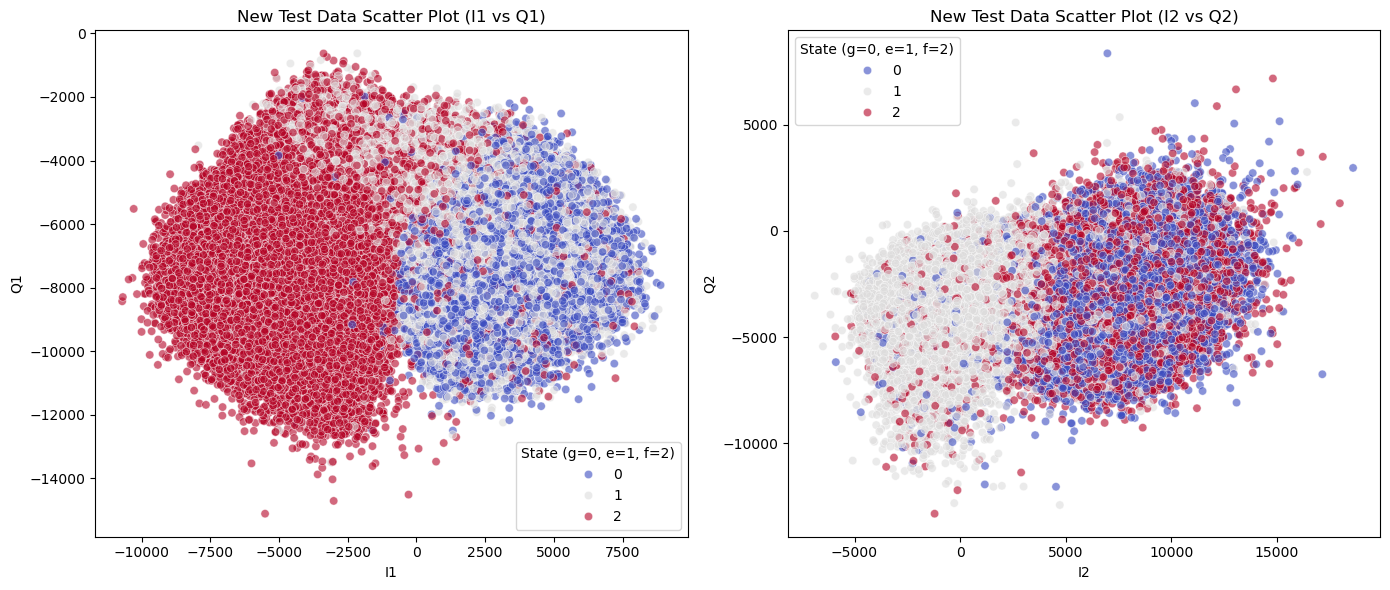

In [10]:
# Convert test data into a DataFrame for easier plotting
new_test_df = pd.DataFrame(new_data, columns=["I1", "Q1", "I2", "Q2", "label"])
new_test_df["predicted"] = new_pred  # Add predicted labels

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: I1 vs Q1
sns.scatterplot(
    data=new_test_df,
    x="I1",
    y="Q1",
    hue="label",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[0],
)
axes[0].set_xlabel("I1")
axes[0].set_ylabel("Q1")
axes[0].set_title("New Test Data Scatter Plot (I1 vs Q1)")
axes[0].legend(title="State (g=0, e=1, f=2)")

# Second subplot: I2 vs Q2
sns.scatterplot(
    data=new_test_df,
    x="I2",
    y="Q2",
    hue="label",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[1],
)
axes[1].set_xlabel("I2")
axes[1].set_ylabel("Q2")
axes[1].set_title("New Test Data Scatter Plot (I2 vs Q2)")
axes[1].legend(title="State (g=0, e=1, f=2)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

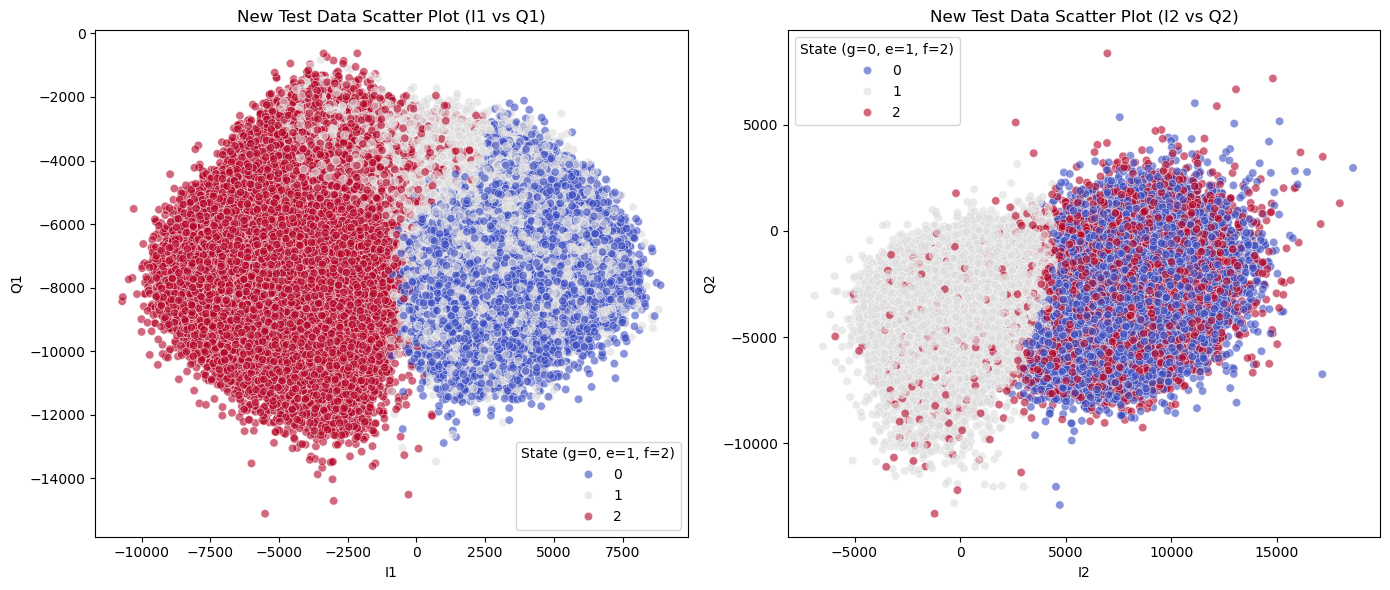

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 147456, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 147456, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing co

In [11]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: I1 vs Q1
sns.scatterplot(
    data=new_test_df,
    x="I1",
    y="Q1",
    hue="predicted",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[0],
)
axes[0].set_xlabel("I1")
axes[0].set_ylabel("Q1")
axes[0].set_title("New Test Data Scatter Plot (I1 vs Q1)")
axes[0].legend(title="State (g=0, e=1, f=2)")

# Second subplot: I2 vs Q2
sns.scatterplot(
    data=new_test_df,
    x="I2",
    y="Q2",
    hue="predicted",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[1],
)
axes[1].set_xlabel("I2")
axes[1].set_ylabel("Q2")
axes[1].set_title("New Test Data Scatter Plot (I2 vs Q2)")
axes[1].legend(title="State (g=0, e=1, f=2)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [16]:
conf_matrix = confusion_matrix(new_test_df['label'], new_test_df['predicted'], normalize= 'true')
conf_matrix

array([[0.95246732, 0.04094919, 0.00658349],
       [0.24473852, 0.72548629, 0.02977519],
       [0.14337532, 0.05349835, 0.80312633]])

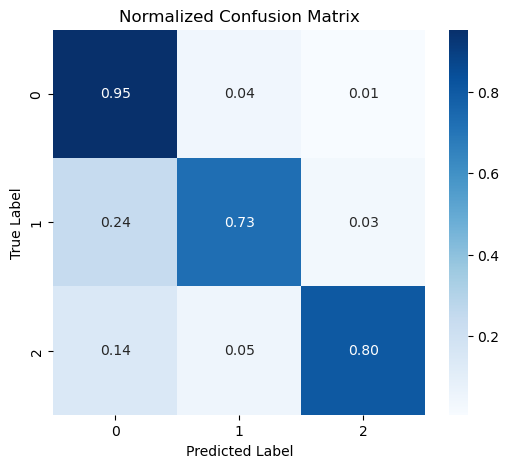

In [18]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()